# Anomalies
En observant l'évolution du nombre de question par semaine sur chacun des thèmes, nous essaierons de proposer des fonctions pour
<ol>
    <li> Y détecter des pics, c-à-d des semaines ou le nombre de questions est anormalement élevé, </li>
    <ol>
        <li> Les plus grands écarts à la moyenne
    </ol>
    <li> Connaître la période associée à chacun de ces pics </li>
    <ol>
        <li> La période dans laquelle on ne redescend pas en dessous de la moyenne
    </ol>
</ol>

## Données nécéssaires

In [5]:
# Imports
# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re

In [15]:
# On récupère les dataframes
%run anomalies_fct.ipynb

# 1. Etude des pics

# A. Etude des pics en écart par rapport à la moyenne
L'idée est de repérer les semaines de pic, où il y a le plus grand écart par rapport à la moyenne

Nous avons essayé plusieurs types de calculs:
<ol>
    <li> <b>ecartAbs</b>: Le maximum de la valeur absolue de la différence avec la moyenne </li>
    <li> <b>ecartRel</b>: ecartAbs divisé par la moyenne</li>
    <li> <b>ecartSqrt</b>: Pour avoir un entre-deux des précédents, on pondère ecartAbs par la racine de la moyenne </li>
</ol>
Nous essayons à chaque fois le résultat par mois et par semaine

In [19]:
# Ecarts obtenus avec les calculs par mois
ecarts_month = ecarts_df_f(count_df_month)
ecarts_month.sort_values(ascending = False,by='ecartSqrt').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
chambres consulaires,40.321429,6.037433,15.602498,6.678571,"[0.0, 0.0, 1.0, 10.0, 1.0, 2.0, 3.0, 7.0, 0.0,..."
taxe sur la valeur ajoutée,40.892857,5.753769,15.339102,7.107143,"[1.0, 2.0, 3.0, 7.0, 5.0, 3.0, 11.0, 5.0, 5.0,..."
ministères et secrétariats d'État,26.428571,7.400000,13.984686,3.571429,"[0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
eau et assainissement,34.071429,4.917526,12.944000,6.928571,"[0.0, 3.0, 5.0, 12.0, 13.0, 18.0, 5.0, 3.0, 7...."
élections et référendums,25.571429,5.774194,12.151312,4.428571,"[2.0, 1.0, 2.0, 4.0, 2.0, 3.0, 6.0, 1.0, 3.0, ..."


In [20]:
# Ecarts obtenus avec les calculs par semaine
ecarts_week = ecarts_df_f(count_df_week)
ecarts_week.sort_values(ascending = False,by='ecartSqrt').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
ministères et secrétariats d'État,28.145299,32.930000,30.443796,0.854701,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
chambres consulaires,21.401709,13.390374,16.928582,1.598291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
médecines alternatives,2.965812,86.750000,16.040081,0.034188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aide aux victimes,4.897436,47.750000,15.292239,0.102564,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
immigration,12.341880,18.753247,15.213492,0.658120,"[0.0, 0.0, 1.0, 1.0, 4.0, 0.0, 5.0, 1.0, 0.0, ..."


In [21]:
# Nous prendrons par la suite le calcul par semaine:
ecarts = ecarts_week #ecarts_month
count_df = count_df_week #count_df_month

### 1. ecartAbs 

In [22]:
# On ordonne d'abord par ecartAbs
ecarts.sort_values(ascending = False,by='ecartAbs').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
sécurité routière,30.350427,6.527574,14.075320,4.649573,"[0.0, 0.0, 2.0, 1.0, 4.0, 2.0, 0.0, 0.0, 0.0, ..."
ministères et secrétariats d'État,28.145299,32.930000,30.443796,0.854701,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
professions de santé,23.256410,2.386842,7.450462,9.743590,"[0.0, 1.0, 3.0, 7.0, 13.0, 11.0, 3.0, 1.0, 3.0..."
agriculture,22.948718,3.254545,8.642201,7.051282,"[1.0, 3.0, 3.0, 6.0, 8.0, 30.0, 9.0, 3.0, 3.0,..."
chambres consulaires,21.401709,13.390374,16.928582,1.598291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


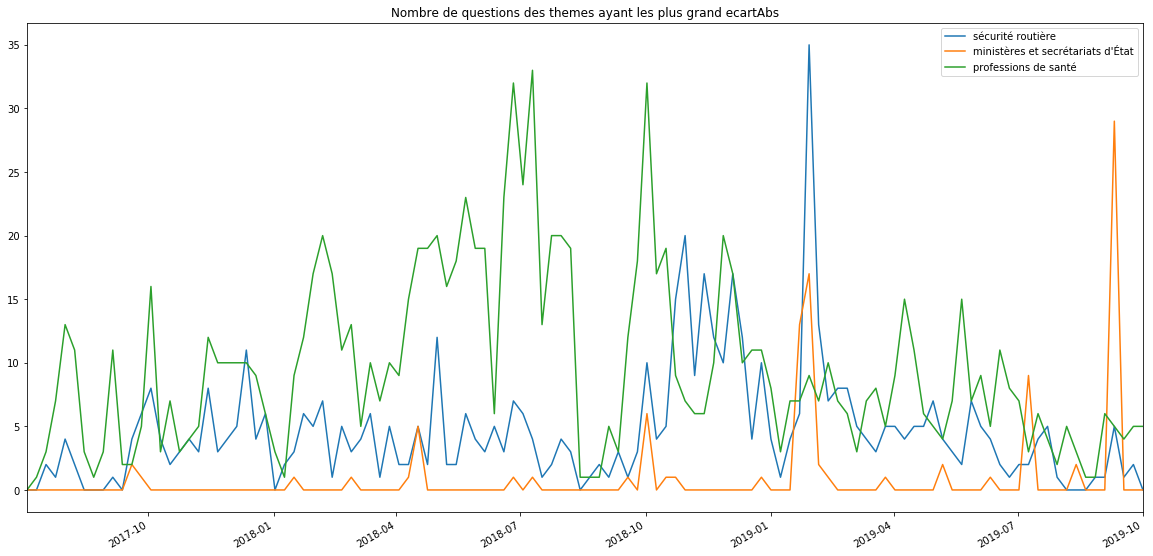

In [23]:
# Les themes correspondants aux meilleurs scores d'ecartAbs
themesEcartAbs = [theme for theme in ecarts_week.sort_values(ascending = False,by='ecartAbs').index]
count_df.plot(figsize = (20,10),title = 'Nombre de questions des themes ayant les plus grand ecartAbs',y = themesEcartAbs[:3])

### 2. ecartRel

In [24]:
# On passe aux écarts relatifs
ecarts.sort_values(ascending = False,by='ecartRel').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
institutions sociales et médico sociales,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
frontaliers,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
grandes écoles,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
nouvelles technologies,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
partis et mouvements politiques,0.991453,116.0,10.724204,0.008547,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


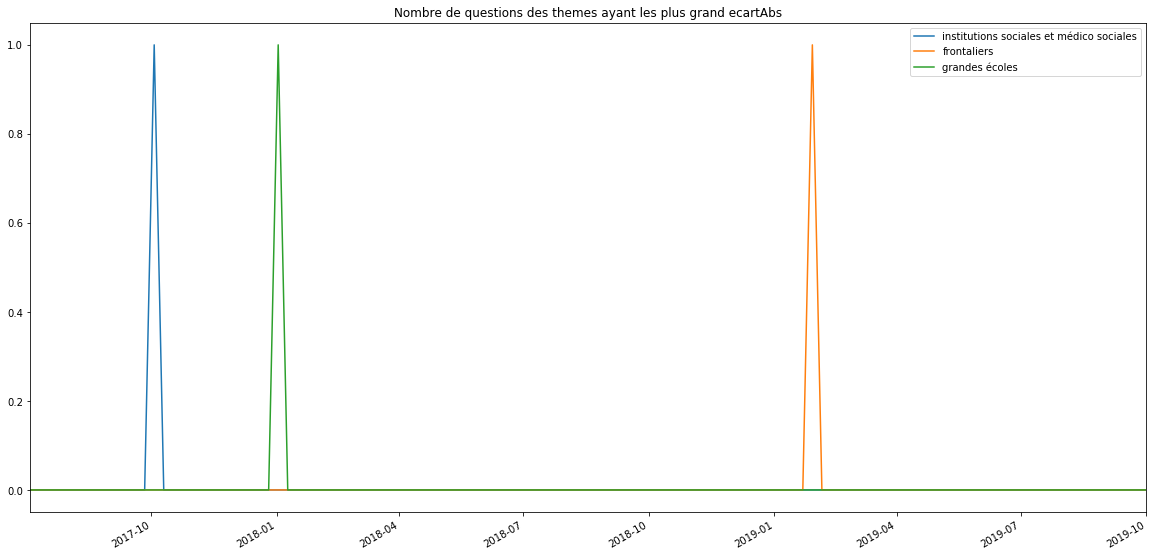

In [25]:
themesEcartRel = [theme for theme in ecarts.sort_values(ascending = False,by='ecartRel').head(3).index]
count_df.plot(figsize = (20,10),title = 'Nombre de questions des themes ayant les plus grand ecartAbs',y = themesEcartRel)

On remarque que ce ne sont que les themes qui ont été abordés une seule fois qui sont sélectionnés, ce qui ne nous intéresse pas. Essayons autre chose :/

### 3. ecartSqrt

In [26]:
# On passe aux écarts racines
ecarts.sort_values(ascending = False,by='ecartSqrt').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,vecteur
theme,,,,,
ministères et secrétariats d'État,28.145299,32.930000,30.443796,0.854701,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
chambres consulaires,21.401709,13.390374,16.928582,1.598291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
médecines alternatives,2.965812,86.750000,16.040081,0.034188,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
aide aux victimes,4.897436,47.750000,15.292239,0.102564,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
immigration,12.341880,18.753247,15.213492,0.658120,"[0.0, 0.0, 1.0, 1.0, 4.0, 0.0, 5.0, 1.0, 0.0, ..."


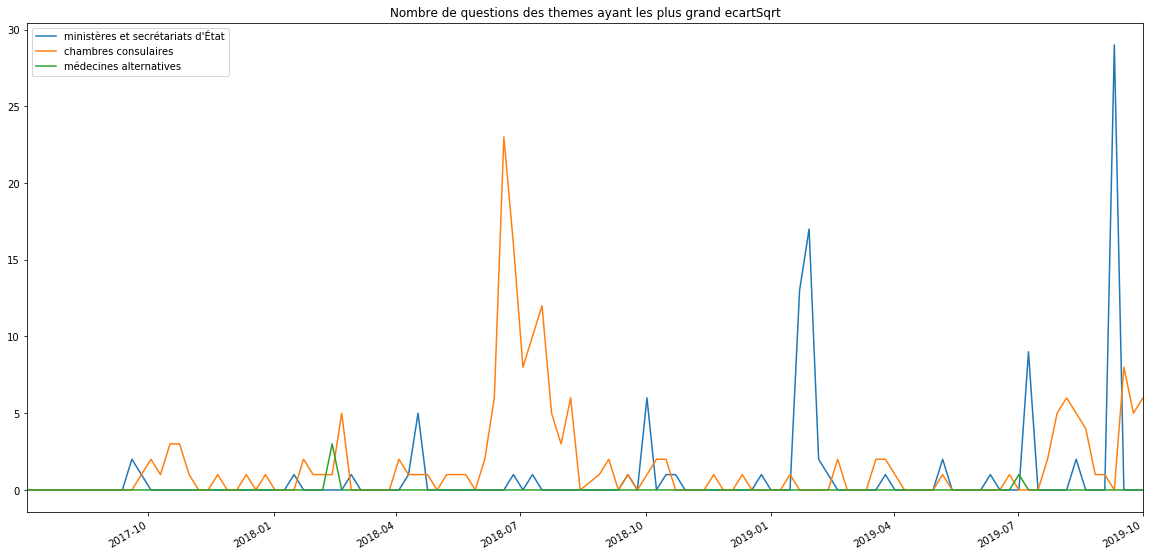

In [27]:
themesEcartSqrt = [theme for theme in ecarts.sort_values(ascending = False,by='ecartSqrt').index]
count_df.plot(figsize = (20,10),title = 'Nombre de questions des themes ayant les plus grand ecartSqrt',y = themesEcartSqrt[:3])

On remarque pour chaque courbes des pics prononcés à des mois précis, en nous pouvons donc en déduire que ce mode de détection semble assez pertinent. 

En revanche, nous avions observé la dernière fois qu'il y avait des tendances généralisées de pic ou de creux à certaines périodes, peut-être que pondérer les graphes par la moyenne de chaque mois pourrait être une solution pour éviter de suivre ce biais.

* Le problème des jours face aux mois
* Le problème de détection des périodes
* Assez étrangement,l'ecartSqrt est plus efficace en travaillant par mois 

# 2. Les fonctions détectant les périodes autour des pics
## A. Méthode naïve : se situer au pic et prendre toute la période autour qui ne descend pas en dessous de la moyenne 

# Exemple d'analyse de pic

Periode: 2019-09-03 00:00:00 2019-09-17 00:00:00
Periode: 2018-05-29 00:00:00 2018-08-14 00:00:00
Periode: 2018-02-06 00:00:00 2018-02-20 00:00:00
Periode: 2019-05-21 00:00:00 2019-06-11 00:00:00
Periode: 2019-06-18 00:00:00 2019-07-02 00:00:00
Periode: 2019-10-01 00:00:00 2017-07-18 00:00:00
Could'nt print < handicapés > because : Empty 'DataFrame': no numeric data to plot
Periode: 2018-09-18 00:00:00 2018-10-02 00:00:00
Periode: 2019-01-15 00:00:00 2019-03-12 00:00:00


,ecartSqrt,moyenne
theme,,
ministères et secrétariats d'État,30.443796,0.854701
chambres consulaires,16.928582,1.598291
médecines alternatives,16.040081,0.034188
aide aux victimes,15.292239,0.102564
immigration,15.213492,0.658120
handicapés,15.035570,0.068376
Gouvernement,14.108445,0.119658
sécurité routière,14.075320,4.649573


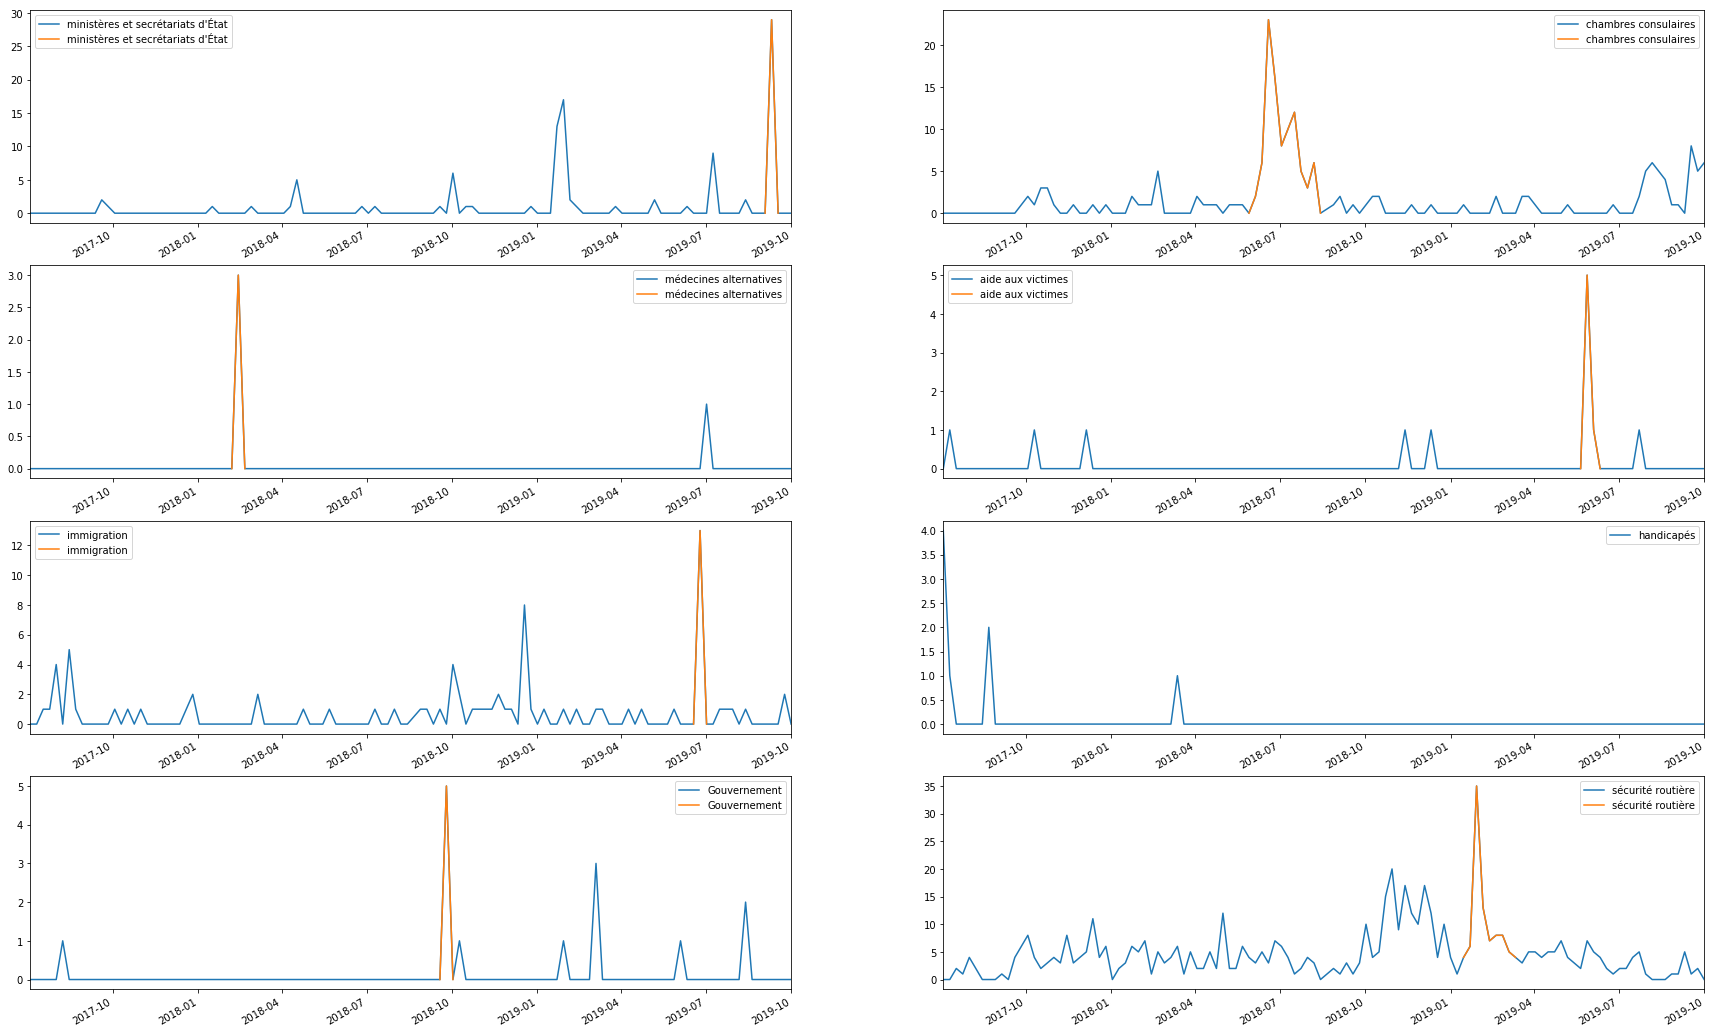

In [38]:
# On commence par repérer un thème et un pic qui nous intéresse
m_meilleurs_themes = 'ecartSqrt'
m_detect_pic = 'max'
m_period_pic = 'above_mean'
nb_to_show = 8
aleatoire  = False
show_figure = True
c = 2

reperage_themes(m_meilleurs_themes, m_detect_pic, m_period_pic, nb_to_show, aleatoire, show_figure, c)

In [29]:
# On choisit un thème qui parait intéressant
theme_choisi = 'chambres consulaires'

In [30]:
# On affiche les différents pics de ce thème
dates_pics = pics_dates(theme_choisi, m_detect_pic)
for i in range(len(dates_pics)):
    print('Pic n°',i,'le',dates_pics[i].day,dates_pics[i].month,dates_pics[i].year)

Pic n° 0 le 19 6 2018


In [31]:
# On choisit un numéro de pic qui paraît intéressant
numero_choisi = 0

Periode: 2018-05-29 00:00:00 2018-07-24 00:00:00


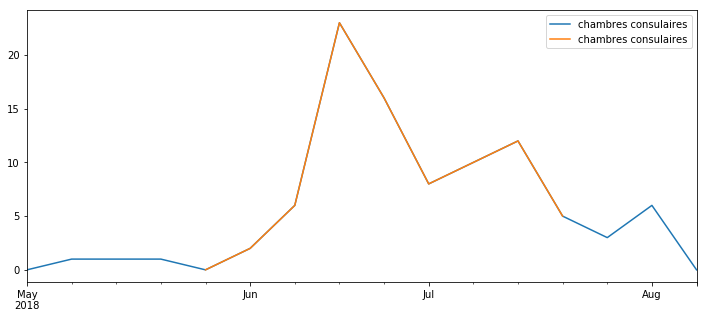

In [32]:
# On affiche les données de ce pic
data = df_periode(theme_choisi,pic_period(theme, dates_pics[numero_choisi], m_period_pic))

In [33]:
data.head(10)

,date_reponse,groupe_auteur,ministere_adresse,question,rubrique,titre
date_question,,,,,,
2018-06-05,2018-11-13,LR,Ministère de l'économie et des finances,M. Jean-Jacques Ferrara alerte M. le ministre ...,chambres consulaires,Menaces sur les chambres de métiers et de l'ar...
2018-06-05,2018-07-03,LR,Ministère du travail,M. Bernard Brochand appelle l'attention de Mme...,chambres consulaires,Chambre de métiers et de l'artisanat
2018-06-12,2018-11-13,LR,Ministère de l'économie et des finances,Mme Isabelle Valentin alerte M. le ministre de...,chambres consulaires,Les conséquences sur le maintien ainsi que la ...
2018-06-12,2019-04-16,LR,Ministère de l'économie et des finances,Mme Frédérique Meunier attire l'attention de M...,chambres consulaires,Baisse des ressources fiscales pour les CCI
2018-06-12,2018-10-16,LR,Ministère de l'action et des comptes publics,M. Sébastien Leclerc interroge M. le ministre ...,chambres consulaires,Effondrement des ressources des chambres de co...
2018-06-12,2018-10-16,LT,Ministère de l'action et des comptes publics,M. Philippe Vigier attire l'attention de M. le...,chambres consulaires,Taxe affectée aux chambres de commerce et d'in...
2018-06-12,2018-10-16,MODEM,Secrétariat d'État auprès du ministre de l'act...,M. Michel Fanget attire l'attention de M. le s...,chambres consulaires,Maintien des ressources pour les chambres de c...
2018-06-12,2018-07-03,LR,Ministère du travail,Mme Isabelle Valentin alerte Mme la ministre d...,chambres consulaires,L'avenir pour les personnels des centres de fo...
2018-06-19,2018-10-16,LR,Secrétariat d'État auprès du ministre de l'act...,M. Jean-Yves Bony appelle l'attention de M. le...,chambres consulaires,Ressources des chambres de commerce et d'indus...


In [34]:
ordre_groupes(data)

,question,date_reponse
groupe_auteur,,
LR,34,34
LAREM,11,11
MODEM,8,7
SOC,8,8
UDI-A-I,8,8
LT,7,7
NI,4,4
FI,2,2


In [35]:
ordre_ministres(data)

,question,date_reponse
ministere_adresse,,
Ministère de l'économie et des finances,44,43
Ministère de l'action et des comptes publics,26,26
Ministère du travail,8,8
Secrétariat d'État auprès du ministre de l'action et des comptes publics,3,3
Ministère de l'agriculture et de l'alimentation,1,1


In [36]:
t = data[([('la nécessité d\'identifier clairement les effets du passage' in i) for i in data.question])]
ordre_groupes(t)

,question,date_reponse
groupe_auteur,,


In [37]:
[i for i in t.titre]

[]

# Pics intéressants repérés
* aide aux victimes, 28 05 2019, LR, Représentation directe du ministre au conseil d'administration au FGTI
* ministères et secrétariats d\'État', 10 9 2019, LREM, Frais de représentation, même lettre
* chambres consulaires, 19 6 2018, _, CCI, baisse de budget critiqué
* immigration, 25 6 2019, FI,  Demandes d'asile des personnes LGBT, 30 fois la même question de la part de Obono
* sécurité routière, 29 1 2019, LR/LAREM/SOC/UDI, 80km, répétition de la même lettre sur 19 députés différents